In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

In [28]:
dir = 'C:\\Users\\Ashwin Gupta\\Desktop\\Work\\Projects\\kagglecatsanddogs_3367a\\PetImages'    #Address for the files

categories = ['Humans', 'Dogs']

#check iteration syntax with first pic
for category in categories:                                                                     #Runs through the folder Humans and dogs
    
    path = os.path.join(dir, category)

    for img in os.listdir(path):                                                                #Runs though all the files and makes a list
        
        imgpath = os.path.join(path, img)
        pet_img = cv2.imread(imgpath, 0)
        cv2.imshow('Image',pet_img)

        break
    break
    
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\Ashwin Gupta\Desktop\Work\Projects\kagglecatsanddogs_3367a\PetImages\Humans\hard_100_1111.jpg


In [7]:
data = []

for category in categories:                                                     #Runs through the folder Humans and dogs
    
    path = os.path.join(dir, category)
    label = categories.index(category)                                          #Indexing Human as 0, Dog as 1

    for img in os.listdir(path):                                                #Runs though all the files and makes a list
        
        imgpath = os.path.join(path, img)
        animal = cv2.imread(imgpath, 0)
        
        try:                                                                    #Try and except to omit unresizable images
            animal = cv2.resize(animal, (200, 200))                             #Resize images to same shape
            image = np.array(animal).flatten()                                  #Converts 2D array image array to 1D image array

            data.append([image, label])
        
        except Exception as e:
            pass 
            
print(len(data))

3608


In [8]:
pick_in = open('data1.pickle', 'wb')                                           #Exporting data as pickle file to save runtimes in future
pickle.dump(data, pick_in)
pick_in.close()

In [9]:
pick_in = open('data1.pickle', 'rb')                                           #Loading data file created using pickle
data = pickle.load(pick_in)
pick_in.close()

In [10]:
features = []                                                                  #Extracting data of Humans and Dogs
labels = []

for feature, label in data:
    
    features.append(feature)
    labels.append(label)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.15, random_state = 7)

In [12]:
model = SVC(C=1, gamma = 'auto', kernel = 'poly')
model.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
prediction = model.predict(x_test)

In [14]:
accuracy = model.score(x_test, y_test)

In [15]:
categories = ['Human', 'Dog']

0.8634686346863468
Human


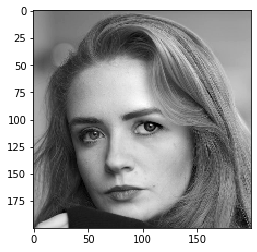

In [16]:
print(accuracy)

print(categories[prediction[0]])

animal = x_test[0].reshape(200,200)
plt.imshow(animal, cmap = 'gray')

In [13]:
#Random State values

# 57 - Girl
# 1 - Boy
# 0 - Dog
# 24 - Girl but dog
# 14 - Dog in hand
# 69 - Dog near cage with food
# 101 - Dog on road
# 768 - Happy Dog
# 7 - Girl

Predicting for input image

In [36]:
test1 = "Woman_7.jpg"
test1 = os.path.join(dir, test1)

In [37]:
testimg = cv2.imread(test1, 0)

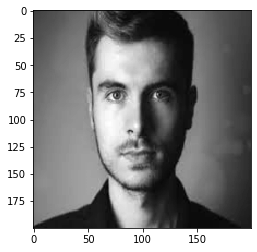

In [38]:
testimg = cv2.resize(testimg, (200, 200))  
plt.imshow(testimg, cmap = 'gray')

image = np.array(testimg).flatten()    

In [39]:
image = [image]

In [40]:
prediction = model.predict(image)

In [42]:
print('The picture belongs to ' + categories[prediction[0]])

The picture belongs to Humans
